## Mutliclass Classification

- Multiclass Classification is also known as **`Multinomial Classification`**

*Working with MNIST Hand Written Digits Dataset*

## Loading the Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

**Important**

- `DESCR`: Provides a description of the Dataset
- `Data`: Provides a Pandas DataFrame representation of the Data for each instance of the Dataset
- `Target`: Provides a Pandas Series representation of all the corresponding digits represented by the instances of the Dataset

In [3]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
mnist["data"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mnist["target"]

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
# Splitting the Data
X, y = mnist["data"], mnist["target"]

## Viewing the Digits

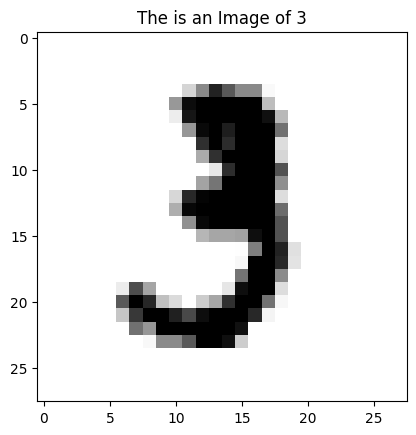

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Index of the Image being Displayed
index = 10

# Formatting the Data
digit_data = X.iloc[index].to_numpy()
digit_image = digit_data.reshape(28, 28)

# Displaying the Image
plt.title(f"The is an Image of {y.iloc[index]}")
plt.imshow(digit_image, cmap="binary")

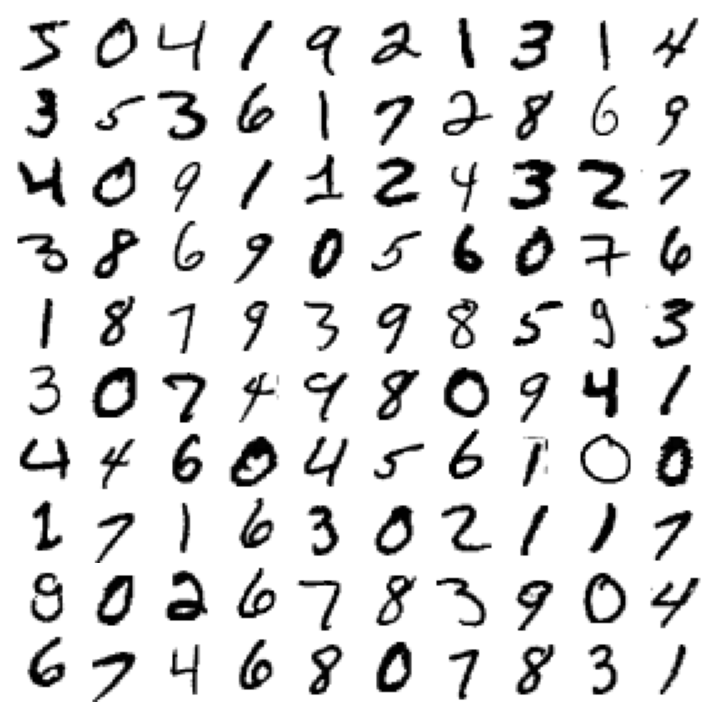

In [8]:
# Adjusting the Plot Layout
plt.figure(figsize=(9, 9))

for i in range(100):
    # Accessing the Image
    digit_data = X.iloc[i].to_numpy()
    digit_image = digit_data.reshape(28, 28)
    
    # Plotting the Image
    plt.subplot(10, 10, i + 1)
    plt.imshow(digit_image, cmap="binary")
    plt.axis("off")
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

**Converting the Datatype of Target from `str` to `int`**

In [9]:
y = y.astype(int)
type(y.iloc[index])

numpy.int64

## Splitting the Training and Testing Data

**Important**
- Taking a small part of the dataset due to increased training time

In [10]:
X_train, X_test, y_train, y_test = X[:7500], X[7500:10000], y[:7500], y[7500:10000]

print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (7500, 784)
y train shape: (7500,)
X test shape: (2500, 784)
y test shape: (2500,)


## Extrapolating from Binary Classification to Multiclass Classification

- `Logistic Regression` and `SVM` are strictly binary classifiers while `SGD`, `Random Forest` and `Naive Bayes` are capable of handling multiple classes.
- There are several approachs to using `Binary Classifiers` for `Multiclass Classification`.
    
    - **One over the Rest (OvR)**
        - In this strategy we train a seperate classifier for each category in the Dataset. Incase of Handwritten Digits we train 10 seperate Binary classifiers.
        - On a given an input the classifier with the highest score is chosen to be the output class.<p></p>  
    
    - **One versus One (OvO)**
        - In this strategy we train a binary classifier for every pair of categories in the Dataset.
        - Thus for a dataset containing `N Categories`
        
        $$ No \thinspace of \thinspace Classifiers = {{N \times {(N - 1)}} \over 2} $$
        
        - Thus for Handwritten Digits we have to train `45 seperate classifiers`.
        
      
**Advantage of OvO**

- *Only a part of the Dataset is used in training to teach the classifier to distinguish between the two classes*
    

## Multiclass Classification Trial

**Important**

- Since SVM's dont scale well for large datasets, only using first 2000 examples.
- This reduces the training time

In [11]:
from sklearn.svm import SVC

# Initialisation
svm_clf = SVC()

# Training
svm_clf.fit(X_train, y_train)

SVC()

In [12]:
# Predicting the Digit Displayed above
svm_clf.predict([X_train.iloc[index]])

array([3])

**Inference**

- When SKLearn detects a `Binary Classifier` being used for `Multiclass Classification` is automatically switches from `OvR to OvO`
- Thus the above classifier trained 45 seperate classifiers and chose the result with the highest score.

In [13]:
# Viewing the Decision Function
decision_scores = svm_clf.decision_function([X_train.iloc[index]])
decision_scores

array([[ 2.7350111 ,  5.93406148,  4.85572354,  9.31681406, -0.30170449,
         6.24164143,  0.70696562,  1.71279507,  8.28455194,  5.07222093]])

**Important**

- A classifier always keeps track of the categories learnt as an ordered list
- The decision scores provided by the decision function follow the same ordered list

In [14]:
# Returns the Index of the element with the highest Decision Score
np.argmax(decision_scores)

3

In [15]:
# Use the Index returned to pin-point the output class
svm_clf.classes_[3]

3

In [16]:
# Classes as Categorised by the Classifier
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Important**

- To view all the 45 classifiers **`Decision Scores`** we change the **`decision_function_shape`** parameter.

In [17]:
# Changes the Strategy used by SKLearn
svm_clf.decision_function_shape = "ovo"

# Making the Prediction
scores_ovo = svm_clf.decision_function([X_train.iloc[index]])
print("The Decision Scores are: \n\n", scores_ovo.round(2))

The Decision Scores are: 

 [[-0.2  -0.5  -2.16  0.81 -1.1   0.06  0.47 -1.01 -0.25  0.14 -1.79  0.78
  -0.51  0.72  0.82 -0.67  0.07 -2.66  0.95 -0.46  1.1   0.5  -0.86  0.31
   2.2   2.24  2.15  2.28  2.06  1.63 -0.94 -0.37 -0.68 -1.58 -1.24  1.5
   0.81 -0.35 -0.1  -0.22 -1.6  -0.28 -1.28 -0.97  0.56]]


## Forced Implementation

- SKLearn has provided additional class constructs to implement OvO or OvR strategies on any Classifier

In [18]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# Initialisation
ovo_clf = OneVsOneClassifier(SVC())
ovr_clf = OneVsRestClassifier(SVC())

**Performance on each Approach**

In [19]:
# OvR Approach
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [20]:
# Prediction
ovr_prediction = ovr_clf.predict([X_train.iloc[index]])
ovr_prediction

array([3])

In [21]:
# No of Estimators used in the OvR Strategy.
len(ovr_clf.estimators_)

10

In [22]:
# OvO Approach
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC())

In [23]:
# Prediction
ovo_clf.predict([X_train.iloc[index]])

array([3])

In [24]:
# No of estimators used in the OvO Strategy
len(ovo_clf.estimators_)

45

**Performance Comparison**

In [25]:
from sklearn.model_selection import cross_val_score

# Reducing the Examples for better training time
scores_ovr = cross_val_score(ovr_clf, X_train, y_train, cv=3, scoring="accuracy")
scores_ovo = cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring="accuracy")

print("OVR: ", scores_ovr)
print("OVO: ", scores_ovo)

OVR:  [0.9488 0.9536 0.9448]
OVO:  [0.9484 0.9568 0.9504]


## Making Predicitions

In [26]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

predictions_ovo = cross_val_predict(ovo_clf, X_test, y_test, cv=3)
predictions_ovr = cross_val_predict(ovr_clf, X_test, y_test, cv=3)

print("One vs One Approach: ", f1_score(y_test, predictions_ovo, average="macro"))
print("One vs Rest Approach: ", f1_score(y_test, predictions_ovr, average="macro"))

One vs One Approach:  0.9138450858011213
One vs Rest Approach:  0.9026726544562003


## Error Analysis

- Now with 90% accuracy improving performance requires reducing the errors incurred.

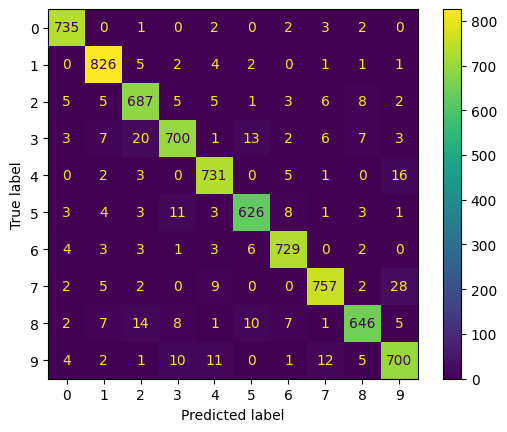

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

# Analysing the predictions made using the Confusion Matrix
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

# Plotting the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.rc("font", size=10)
plt.show()

**Inference**

- Most of the digits on the main diagonal are classified properly.
- While `5` and `8` seem to have low accuracy.
- Many digits seem to be wrongly classified as `2`.

*Carrying out `Normalisation` of the Errors should give a better estimate of the percentage error for each digit*

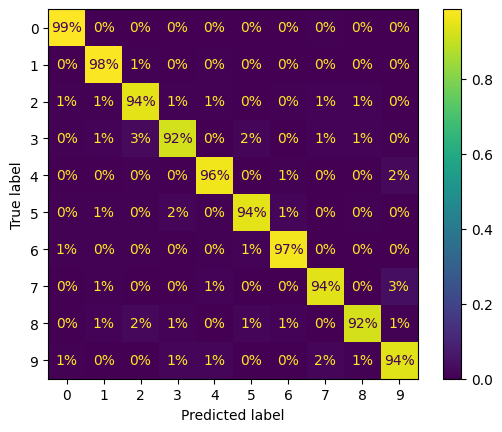

In [28]:
plt.rc("font", size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [29]:
sample_weight = (y_train_pred != y_train)
sample_weight

0       False
1       False
2       False
3       False
4       False
        ...  
7495    False
7496    False
7497    False
7498    False
7499    False
Name: class, Length: 7500, dtype: bool

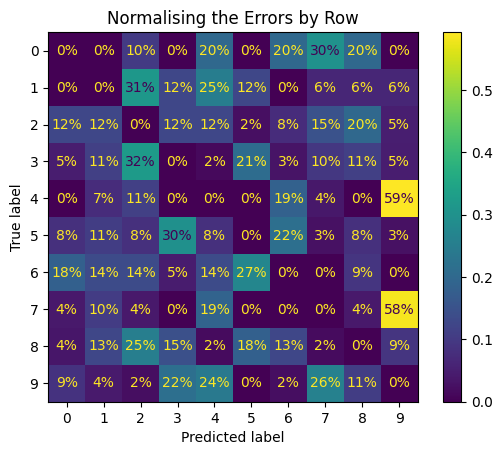

In [30]:
plt.rc("font", size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", sample_weight=sample_weight, values_format=".0%")
plt.title("Normalising the Errors by Row")
plt.show()

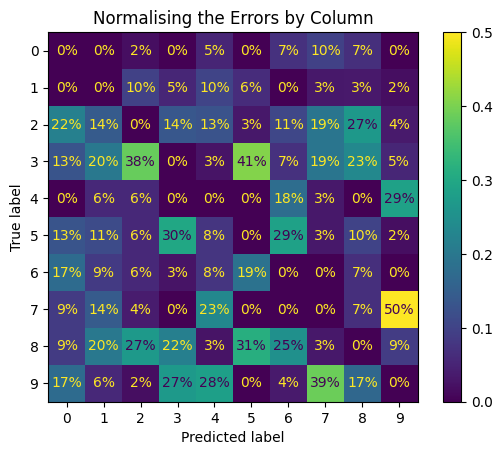

In [31]:
plt.rc("font", size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="pred", sample_weight=sample_weight, values_format=".0%")
plt.title("Normalising the Errors by Column")
plt.show()

**Inference**
- By adding the boolean sample weight we see a clear difference in the percentage of a digit being misclassified as other digits.

## Multilabel Classification

- A classification system that outputs multiple binary tags is called **`Multilabel Classification`**
- A face-recognition system tries to recognise all the faces it has been trained on given an image.
- It then tags the faces it has found in the image.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Creating a dataset with multiple labels
# 1. To find if a digit is >= 7
# 2. To find if the provided digit is odd
y_train_large = (y_train >= 7)
y_train_odd = (y_train %2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

# Initialisation
knn_clf = KNeighborsClassifier()

# Training 
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [33]:
y_multilabel[:5, :]

array([[False,  True],
       [False, False],
       [False, False],
       [False,  True],
       [ True,  True]])

In [34]:
y_train[:5]

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64

In [35]:
# Making a prediction of the above displayed digit 3
knn_clf.predict([X_train.iloc[index]])

array([[False,  True]])

**Performance Measure**
- Taking a Weighted Average of the F1 Scores for each individual label.

In [36]:
y_train_pred_knn = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_pred_knn, average="macro")

0.9543978795498673

In [37]:
f1_score(y_multilabel, y_train_pred_knn, average="weighted")

0.9571268099394852

**Important**
- `Macro`: Gives each label of the dataset equal importance
- `Weighted`: Assigns a weight for each label by counting the no of instances for each label

## Multioutput Classification

- It is a generalisation of `Multilabel Classification`
- Adding `Noise` to the pixel of an image to then re-adjust the intensities of the pixels in the image to make it clear again.
- Thus here the model needs to predict the several ouputs for each label.
- Each label has multiple pixel intensities that need to be calculated.

In [38]:
# Adding noise using the np.randint()
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_with_noise = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_with_noise = X_test + noise

# Changing the Targets to the Original Images
y_train_mod = X_train
y_test_mod = X_test

**Viewing the Images**

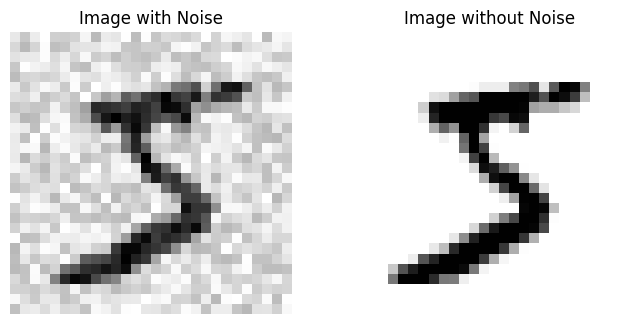

In [39]:
# Index of digit being Displayed
index = 0

# Adjusting the Plot Layout
plt.figure(figsize=(8, 6))

# Plotting the Image with Noise
plt.subplot(1, 2, 1)
noise_image_data = X_train_with_noise.iloc[index].to_numpy()
noise_image = noise_image_data.reshape(28, 28)
plt.imshow(noise_image, cmap="binary")
plt.title("Image with Noise")
plt.axis("off")

# Plotting the Image without Noise
plt.subplot(1, 2, 2)
original_image_data = y_train_mod.iloc[index].to_numpy()
image = original_image_data.reshape(28, 28)
plt.imshow(image, cmap="binary")
plt.title("Image without Noise")
plt.axis("off")
plt.show()

In [40]:
# Training
knn_clf.fit(X_train_with_noise, y_train_mod)

# Predictions
y_test_with_no_noise = cross_val_predict(knn_clf, X_test_with_noise, y_test_mod, cv=3)

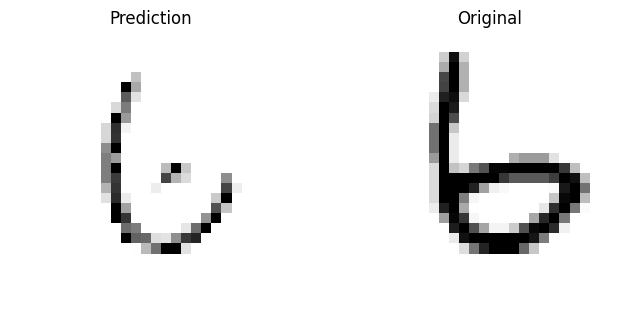

In [41]:
# Viewing the First 5 Images
plt.figure(figsize=(8, 6))
i = 80
    
# Plotting the Prediction
plt.subplot(1, 2, 1)
prediction_image = y_test_with_no_noise[i, :].reshape(28, 28)
plt.imshow(prediction_image, cmap="binary")
plt.title("Prediction")
plt.axis("off")

# Plotting the Original Image
plt.subplot(1, 2, 2)
original_data = y_test_mod.iloc[i].to_numpy()
original_image = original_data.reshape(28, 28)
plt.imshow(original_image, cmap="binary")
plt.title("Original")
plt.axis("off")
plt.show()

### Seem to be identical 🙂

Hope you found the notebook insightful.